In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
%matplotlib notebook

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


In [3]:
temp2018 = pd.read_csv('./BA-temp-2018.csv')
bike_ride_2018 = pd.read_csv('./BA-bikes-rides-2018.csv')

In [4]:
# inspect the data
bike_ride_2018.head()

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa


In [5]:
# reset the index to date in both dataframes, later join them

temp2018['date2'] = pd.to_datetime(temp2018['date']).dt.date
temp2018.set_index('date2', inplace=True)

bike_ride_2018.rename(columns={'fecha_origen_recorrido':'dateTime'}, inplace=True)

bike_ride_2018['date'] = pd.to_datetime(bike_ride_2018['dateTime']).dt.date
bike_ride_2018.set_index('date', inplace=True)

In [6]:
# put -1 in NaN values
bike_ride_2018 = bike_ride_2018.fillna(-1)
# create new dataframe with date index and only a column for travel duration

bikeRides = bike_ride_2018[['duracion_recorrido']]
bikeRides['duration'] = pd.to_timedelta(bikeRides['duracion_recorrido'])
bikeRides.drop(columns=['duracion_recorrido'], inplace=True)

# a new dataframe to group individual bike ride duration for each date

bikeRidesDay = bikeRides.groupby(['date']).sum()
bikeRidesDay

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,duration
date,
2018-01-01,61 days 15:15:00.999999910
2018-01-02,75 days 04:05:46.999999889
2018-01-03,89 days 13:49:32.999999913
2018-01-04,80 days 05:55:33.999999912
2018-01-05,55 days 15:31:58.999999889
...,...
2018-12-26,53 days 01:12:31
2018-12-27,57 days 09:35:15
2018-12-28,55 days 16:28:38


In [8]:
# create new float column 'hs_day'
def create_total_hs():
	bikeRidesDay['hs_day'] = 0.0
	for b in bikeRidesDay.index:    
 		bikeRidesDay['hs_day'][b] = ((bikeRidesDay['duration'][b]).days)*24 + ((bikeRidesDay['duration'][b]).seconds)/3600 
create_total_hs()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
# join both dataframes
df = bikeRidesDay.join(temp2018)
df

Text(0.5, 1.0, 'Bike rides/Avg.Temperature correlation in Buenos Aires, 2018')

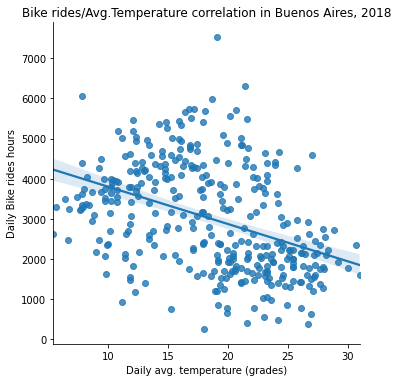

In [13]:
# Graph results
g = sns.lmplot(x='tavg', y='hs_day', data=df)
g = (g.set_axis_labels("Daily avg. temperature (grades)", "Daily Bike rides hours"))
ax = plt.gca()
ax.set_title("Bike rides/Avg.Temperature correlation in Buenos Aires, 2018")